Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding

Dataset-https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx

In [2]:
df = pd.read_csv("Traffic_Crashes_Resulting_in_Injury-main.csv")
df.head()

C:\Users\surit\AppData\Local\Temp\ipykernel_10632\1090088467.py:1: DtypeWarning: Columns (4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_Crashes_Resulting_in_Injury-main.csv")


,id,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,...,party2_move_pre_acc,point,data_as_of,data_updated_at,data_loaded_at,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,22541,26470000,5903000.0,130374450,37.774953,-122.453139,SFPD-CROSSROADS,CITY STREET,5/7/2013 16:35,...,Stopped In Road,POINT (-122.45314 37.774952),NaN,NaN,3/25/2023 3:30,12.0,12.0,7.0,4.0,18.0
1,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,8968,24083000,NaN,130797608,37.757167,-122.416720,SFPD-CROSSROADS,CITY STREET,9/22/2013 1:15,...,Stopped In Road,POINT (-122.41672 37.757168),NaN,NaN,3/25/2023 3:30,53.0,53.0,3.0,2.0,20.0
2,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,18399,30756000,NaN,140070870,37.771886,-122.423397,SFPD-CROSSROADS,CITY STREET,1/24/2014 15:38,...,Not Stated,POINT (-122.42339 37.771885),NaN,NaN,3/25/2023 3:30,32.0,32.0,1.0,5.0,20.0
3,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,44333,27966000,6435101.0,170778743,37.769543,-122.510739,SFPD-CROSSROADS,CITY STREET,9/23/2017 22:02,...,NaN,POINT (-122.51074 37.769543),NaN,NaN,3/25/2023 3:30,9.0,9.0,8.0,4.0,12.0
4,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,50283,27286000,316000.0,190787940,37.782518,-122.464393,SFPD-INTERIM DB,CITY STREET,10/19/2019 9:29,...,NaN,POINT (-122.46439 37.782516),NaN,NaN,3/25/2023 3:30,5.0,5.0,8.0,4.0,11.0


In [3]:
df.shape

(55300, 61)

In [4]:
df.columns

Index(['id', 'unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       

In [5]:
df.collision_severity.value_counts()

Injury (Complaint of Pain)    35169
Injury (Other Visible)        15802
Injury (Severe)                3812
Fatal                           516
Medical                           1
Name: collision_severity, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55300 entries, 0 to 55299
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            55300 non-null  object 
 1   unique_id                     55300 non-null  int64  
 2   cnn_intrsctn_fkey             55300 non-null  int64  
 3   cnn_sgmt_fkey                 24932 non-null  float64
 4   case_id_pkey                  55300 non-null  object 
 5   tb_latitude                   55153 non-null  float64
 6   tb_longitude                  55153 non-null  float64
 7   geocode_source                55300 non-null  object 
 8   geocode_location              55300 non-null  object 
 9   collision_datetime            55292 non-null  object 
 10  collision_date                55300 non-null  object 
 11  collision_time                55244 non-null  object 
 12  accident_year                 55300 non-null  int64  
 13  m

In [7]:
df.drop(columns=['intersection','id','cnn_sgmt_fkey','unique_id','juris','case_id_pkey','collision_time','collision_datetime','collision_date','vz_pcf_link','street_view','point','data_as_of','data_updated_at','data_loaded_at'],inplace=True)

In [8]:
df.head()

,cnn_intrsctn_fkey,tb_latitude,tb_longitude,geocode_source,geocode_location,accident_year,month,day_of_week,time_cat,officer_id,...,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,26470000,37.774953,-122.453139,SFPD-CROSSROADS,CITY STREET,2013,May,Tuesday,2:01 pm to 6:00 pm,845,...,West,Making Right Turn,Driver,East,Stopped In Road,12.0,12.0,7.0,4.0,18.0
1,24083000,37.757167,-122.416720,SFPD-CROSSROADS,CITY STREET,2013,September,Sunday,10:01 pm to 2:00 am,1884,...,North,Proceeding Straight,Bicyclist,North,Stopped In Road,53.0,53.0,3.0,2.0,20.0
2,30756000,37.771886,-122.423397,SFPD-CROSSROADS,CITY STREET,2014,January,Friday,2:01 pm to 6:00 pm,441,...,South,Making Left Turn,Driver,Not Stated,Not Stated,32.0,32.0,1.0,5.0,20.0
3,27966000,37.769543,-122.510739,SFPD-CROSSROADS,CITY STREET,2017,September,Saturday,10:01 pm to 2:00 am,449,...,South,Ran Off Road,NaN,NaN,NaN,9.0,9.0,8.0,4.0,12.0
4,27286000,37.782518,-122.464393,SFPD-INTERIM DB,CITY STREET,2019,October,Saturday,6:01 am to 10:00 am,2456,...,West,Making U Turn,NaN,NaN,NaN,5.0,5.0,8.0,4.0,11.0


In [9]:
df.shape

(55300, 46)

In [10]:
print(df.dtypes)

cnn_intrsctn_fkey                 int64
tb_latitude                     float64
tb_longitude                    float64
geocode_source                   object
geocode_location                 object
accident_year                     int64
month                            object
day_of_week                      object
time_cat                         object
officer_id                       object
reporting_district               object
beat_number                      object
primary_rd                       object
secondary_rd                     object
distance                        float64
direction                        object
weather_1                        object
weather_2                        object
collision_severity               object
type_of_collision                object
mviw                             object
ped_action                       object
road_surface                     object
road_cond_1                      object
road_cond_2                      object


Correlation Heatmap

C:\Users\surit\AppData\Local\Temp\ipykernel_10632\700578936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


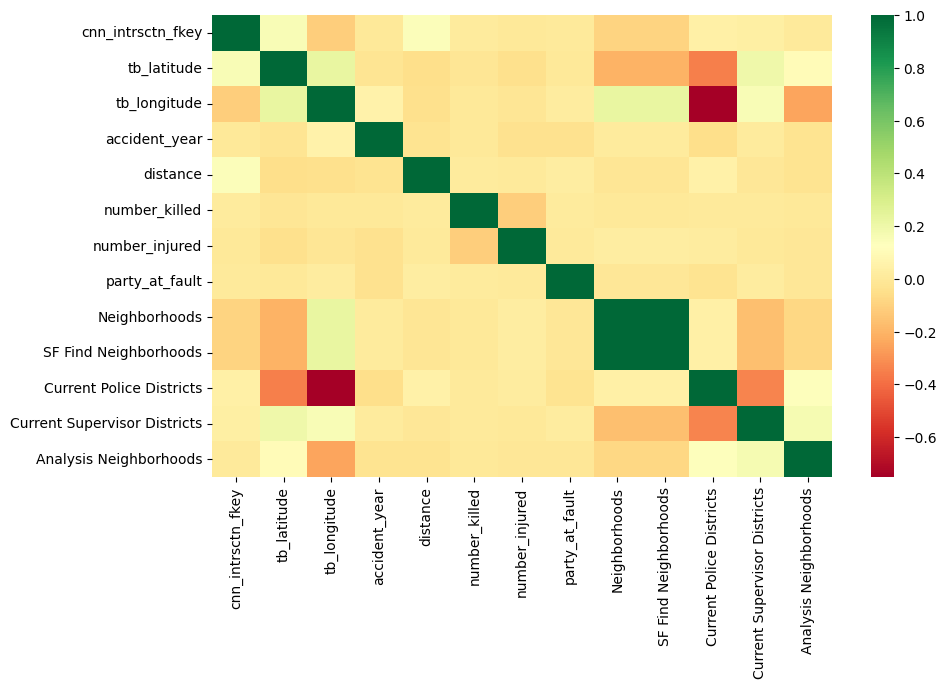

In [11]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap ='RdYlGn')
plt.show()

### Data Preparation 

In [12]:
from sklearn.preprocessing import LabelEncoder

cols = df.select_dtypes(include=['object']).columns

for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [13]:
df = df[df.select_dtypes(include=['int64','int32','float64']).columns]

In [14]:
df.head()

,cnn_intrsctn_fkey,tb_latitude,tb_longitude,geocode_source,geocode_location,accident_year,month,day_of_week,time_cat,officer_id,...,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,26470000,37.774953,-122.453139,0,0,2013,8,5,3,2647,...,5,6,1,0,19,12.0,12.0,7.0,4.0,18.0
1,24083000,37.757167,-122.416720,0,0,2013,11,3,1,1029,...,2,16,0,1,19,53.0,53.0,3.0,2.0,20.0
2,30756000,37.771886,-122.423397,0,0,2014,4,0,3,2255,...,4,5,1,2,9,32.0,32.0,1.0,5.0,20.0
3,27966000,37.769543,-122.510739,0,0,2017,11,2,1,2265,...,4,17,6,5,21,9.0,9.0,8.0,4.0,12.0
4,27286000,37.782518,-122.464393,1,0,2019,10,2,4,1657,...,5,7,6,5,21,5.0,5.0,8.0,4.0,11.0


In [15]:
df.isnull().sum()

cnn_intrsctn_fkey                  0
tb_latitude                      147
tb_longitude                     147
geocode_source                     0
geocode_location                   0
accident_year                      0
month                              0
day_of_week                        0
time_cat                           0
officer_id                         0
reporting_district                 0
beat_number                        0
primary_rd                         0
secondary_rd                       0
distance                          79
direction                          0
weather_1                          0
weather_2                          0
collision_severity                 0
type_of_collision                  0
mviw                               0
ped_action                         0
road_surface                       0
road_cond_1                        0
road_cond_2                        0
lighting                           0
control_device                     0
v

Handling null values

In [16]:
df['tb_latitude'].fillna(df['tb_latitude'].mean(), inplace=True)
df['tb_longitude'].fillna(df['tb_longitude'].mean(), inplace=True)
df['distance'].fillna(df['distance'].mean(), inplace=True)
df['party_at_fault'].fillna(df['party_at_fault'].mean(), inplace=True)
df['number_killed'].fillna(df['number_killed'].mean(), inplace=True)
df['Neighborhoods'].fillna(df['Neighborhoods'].mean(), inplace=True)
df['SF Find Neighborhoods'].fillna(df['SF Find Neighborhoods'].mean(), inplace=True)
df['Current Police Districts'].fillna(df['Current Police Districts'].mean(), inplace=True)
df['Current Supervisor Districts'].fillna(df['Current Supervisor Districts'].mean(), inplace=True)
df['Analysis Neighborhoods'].fillna(df['Analysis Neighborhoods'].mean(), inplace=True)

In [17]:
df.isnull().sum()

cnn_intrsctn_fkey               0
tb_latitude                     0
tb_longitude                    0
geocode_source                  0
geocode_location                0
accident_year                   0
month                           0
day_of_week                     0
time_cat                        0
officer_id                      0
reporting_district              0
beat_number                     0
primary_rd                      0
secondary_rd                    0
distance                        0
direction                       0
weather_1                       0
weather_2                       0
collision_severity              0
type_of_collision               0
mviw                            0
ped_action                      0
road_surface                    0
road_cond_1                     0
road_cond_2                     0
lighting                        0
control_device                  0
vz_pcf_code                     0
vz_pcf_group                    0
vz_pcf_descrip

In [18]:
df.shape

(55300, 46)

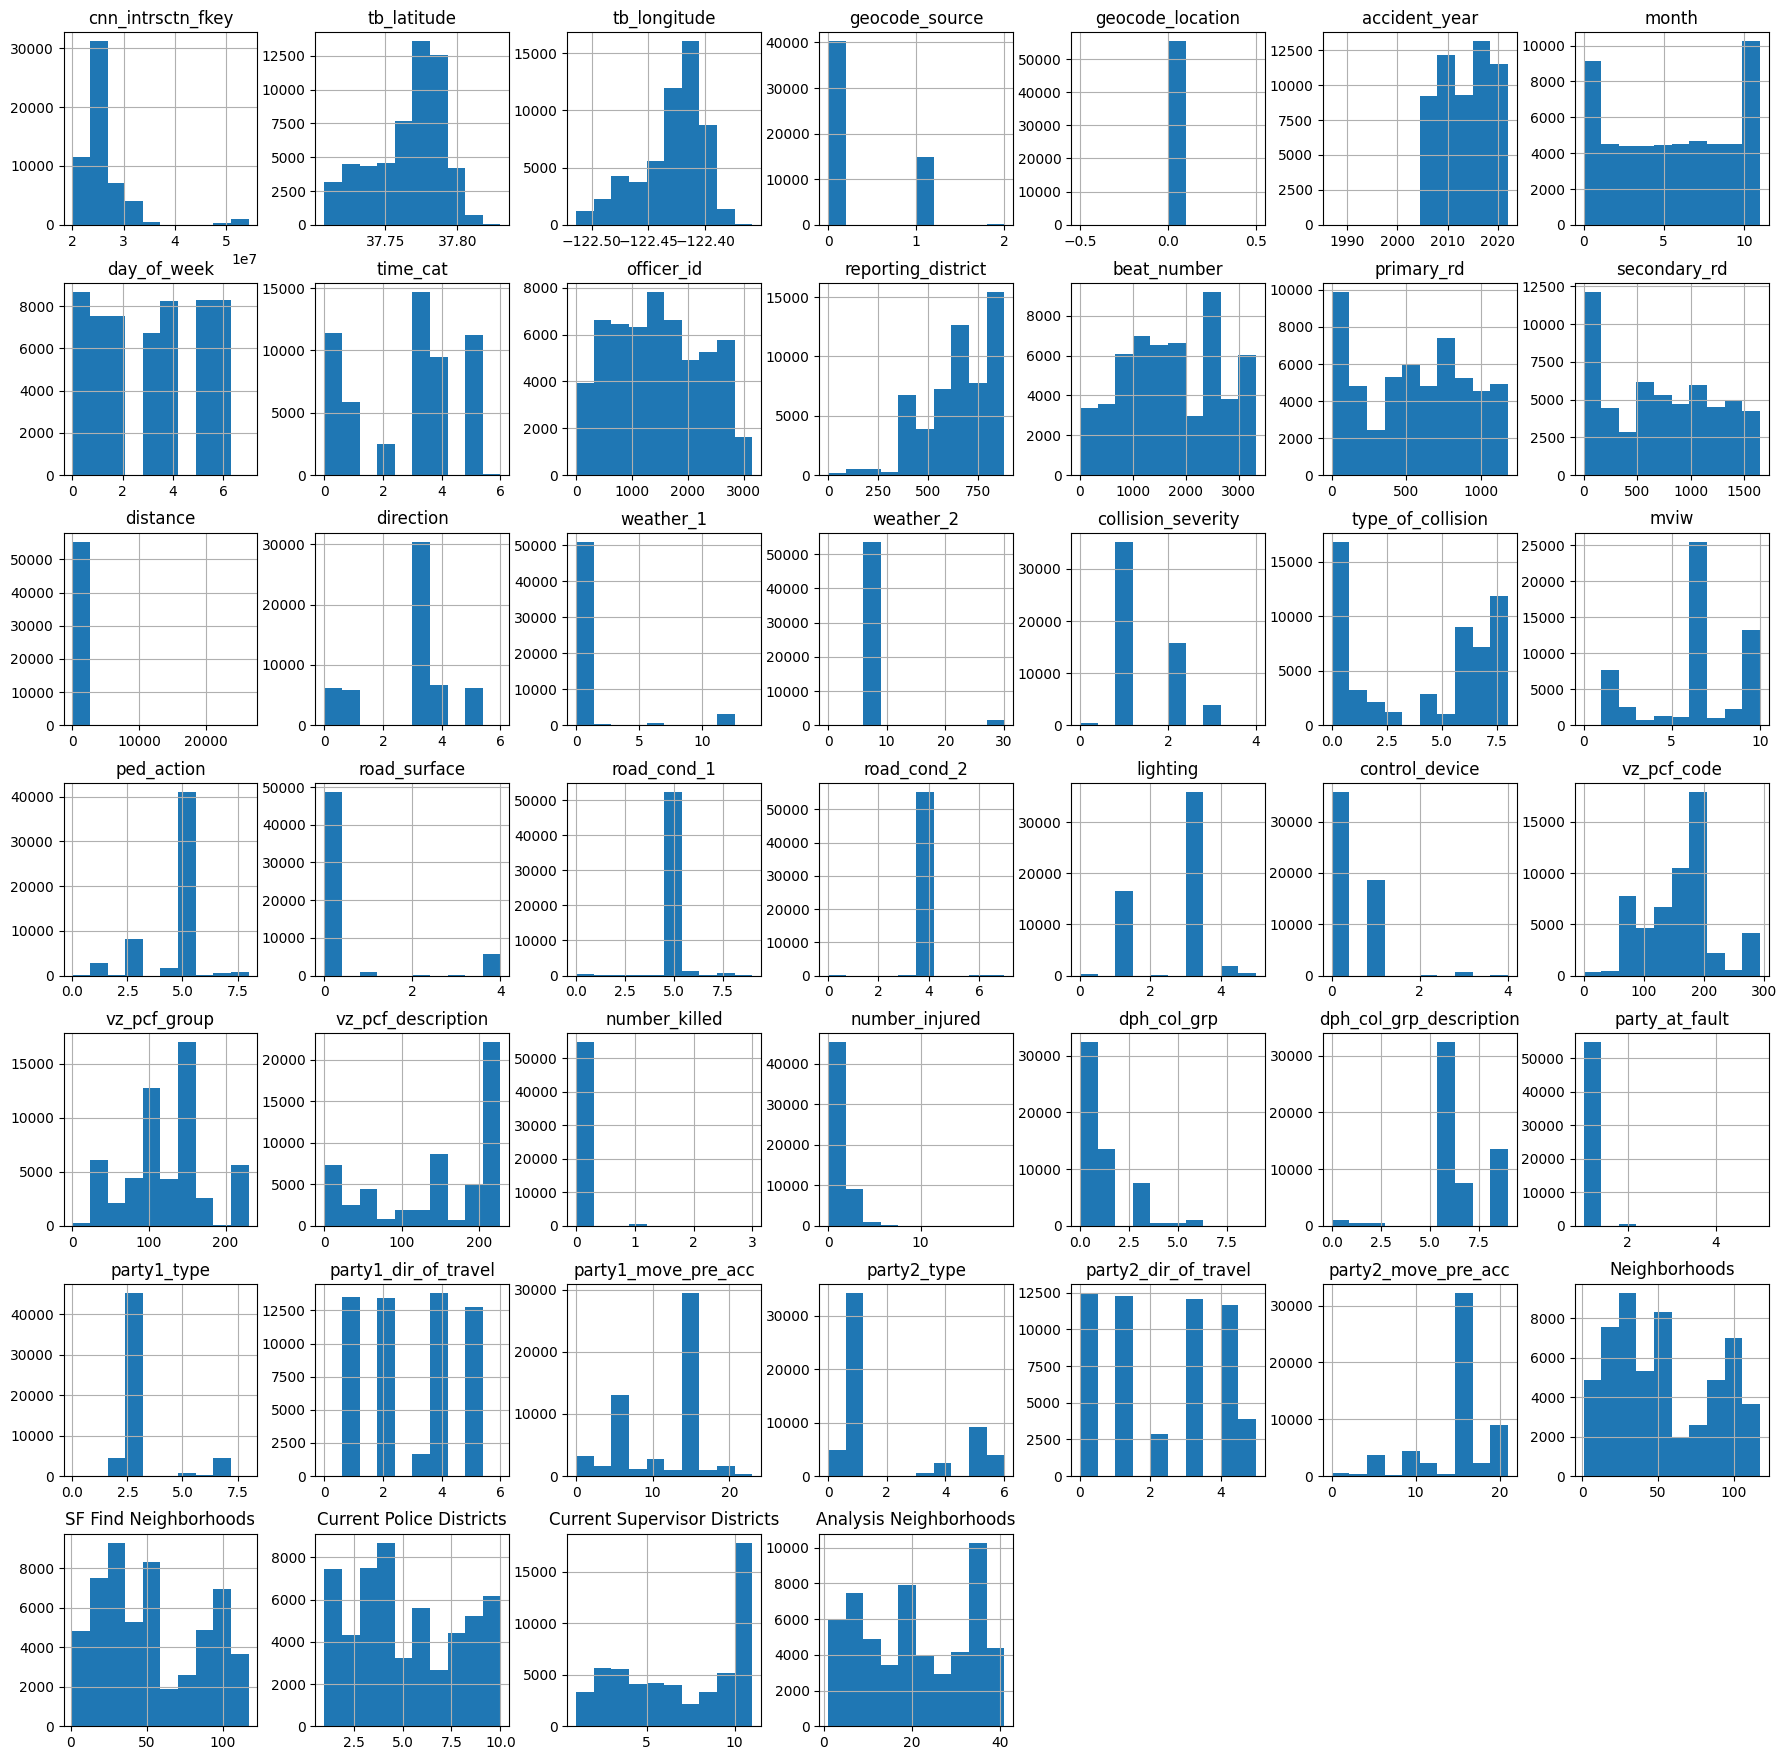

In [19]:
plot = df.hist(figsize=(22,22))

In [18]:
df.collision_severity.value_counts()

1    35169
2    15802
3     3812
0      516
4        1
Name: collision_severity, dtype: int64

Detecting Outliers

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM


# Fit the models
lof = LocalOutlierFactor(n_neighbors=20)
isf = IsolationForest(n_estimators=100, contamination='auto')
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)

lof_pred = lof.fit_predict(df)
isf_pred = isf.fit_predict(df)
ocsvm_pred = ocsvm.fit_predict(df)

# Print the outlier predictions
print("LOF outlier predictions:\n", lof_pred)
print("ISF outlier predictions:\n", isf_pred)
print("OCSVM outlier predictions:\n", ocsvm_pred)


### Modeling 

In [19]:
X = df.drop(columns='collision_severity')
y = df['collision_severity']

Test Train Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Normalizing and Standardizing

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Random Forest Classifier

In [23]:
rf = RandomForestClassifier(max_depth=26)

rf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.976
Test set score: 0.656
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       140
           1       0.68      0.92      0.78      8762
           2       0.49      0.21      0.30      3959
           3       0.38      0.00      0.01       964

    accuracy                           0.66     13825
   macro avg       0.64      0.53      0.52     13825
weighted avg       0.61      0.66      0.59     13825



Decision Tree Classifier

In [27]:
tree = DecisionTreeClassifier(max_depth=10)

tree.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(tree.score(X_test, y_test)))

Train set score: 0.685
Test set score: 0.647


XGBoost

In [28]:
xg = XGBClassifier(n_estimators=50)

xg.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(xg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(xg.score(X_test, y_test)))

y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.734
Test set score: 0.655
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       140
           1       0.68      0.92      0.78      8762
           2       0.48      0.21      0.29      3959
           3       0.29      0.03      0.06       964

    accuracy                           0.65     13825
   macro avg       0.61      0.54      0.53     13825
weighted avg       0.60      0.65      0.59     13825



kNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(knn.score(X_test, y_test)))

Train set score: 0.861
Test set score: 0.514


Naïve Bayes

In [248]:
nb = GaussianNB()

nb.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(nb.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(nb.score(X_test, y_test)))

Train set score: 0.092
Test set score: 0.637


### Discussion of Results 

Most Performed models - Random forest, XGBoost, Decsion trees

Clustering

In [29]:
# Importing required libraries
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train)

# EM clustering
em = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
em.fit(X_train)

# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(X_train)

# Visualizing the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title('K-Means')

plt.subplot(1, 4, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.title('DBSCAN')

plt.subplot(1, 4, 3)
plt.scatter(X[:, 0], X[:, 1], c=em.predict(X_train))
plt.title('EM')

plt.subplot(1, 4, 4)
plt.scatter(X[:, 0], X[:, 1], c=agglo.labels_)
plt.title('Agglomerative')

plt.show()
